In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('animes.csv')
df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              59 non-null     object 
 1   Genre_Tags         59 non-null     object 
 2   Source             59 non-null     object 
 3   Nb_Episodes        59 non-null     int64  
 4   Status             59 non-null     object 
 5   Studio             59 non-null     object 
 6   Date_Pub           59 non-null     object 
 7   Note_Globale       59 non-null     float64
 8   Note_Meilleur_Ep   59 non-null     float64
 9   Meilleur_Ep_Titre  59 non-null     object 
 10  Comm_Meilleur_Ep   59 non-null     object 
 11  Note_Pire_Ep       59 non-null     float64
 12  Pire_Ep_Titre      59 non-null     object 
 13  Comm_Pire_Ep       59 non-null     object 
 14  Comm_Saison_1      59 non-null     object 
 15  Comm_Saison_2      59 non-null     object 
 16  Comm_Saison_3      49 non-nu

In [4]:
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Anime              59 non-null     object        
 1   Genre_Tags         59 non-null     object        
 2   Source             59 non-null     object        
 3   Nb_Episodes        59 non-null     int64         
 4   Status             59 non-null     object        
 5   Studio             59 non-null     object        
 6   Date_Pub           59 non-null     datetime64[ns]
 7   Note_Globale       59 non-null     float64       
 8   Note_Meilleur_Ep   59 non-null     float64       
 9   Meilleur_Ep_Titre  59 non-null     object        
 10  Comm_Meilleur_Ep   59 non-null     object        
 11  Note_Pire_Ep       59 non-null     float64       
 12  Pire_Ep_Titre      59 non-null     object        
 13  Comm_Pire_Ep       59 non-null     object        
 14  Comm_Saison_

In [8]:
df = df.drop_duplicates()

In [9]:
len(df)

57

In [14]:
import numpy as np

In [15]:
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']
df['Regularite'] = 10 - df['Ecart']
df['Longueur'] = np.log(df['Nb_Episodes'])
print(df[['Anime', 'Regularite','Note_Globale', 'Ecart']].head())

                              Anime  Regularite  Note_Globale  Ecart
0                            Naruto         6.2           8.4    3.8
1                            Trigun         7.4           8.2    2.6
2                     Dragon Ball Z         6.5           8.7    3.5
3  Fullmetal Alchemist: Brotherhood         6.7           9.1    3.3
4                      Cowboy Bebop         7.5           8.8    2.5


In [16]:
top_regularite = df.sort_values(by='Regularite', ascending=False)
top_regularite[['Anime', 'Regularite', 'Note_Globale']].head(5)

,Anime,Regularite,Note_Globale
36,Claymore,9.2,7.7
53,Mashle: Magic and Muscles,9.1,7.6
50,Chainsaw Man,9.0,8.4
41,Your Lie in April,8.9,8.6
40,Zetsuen No Tempest,8.9,7.9


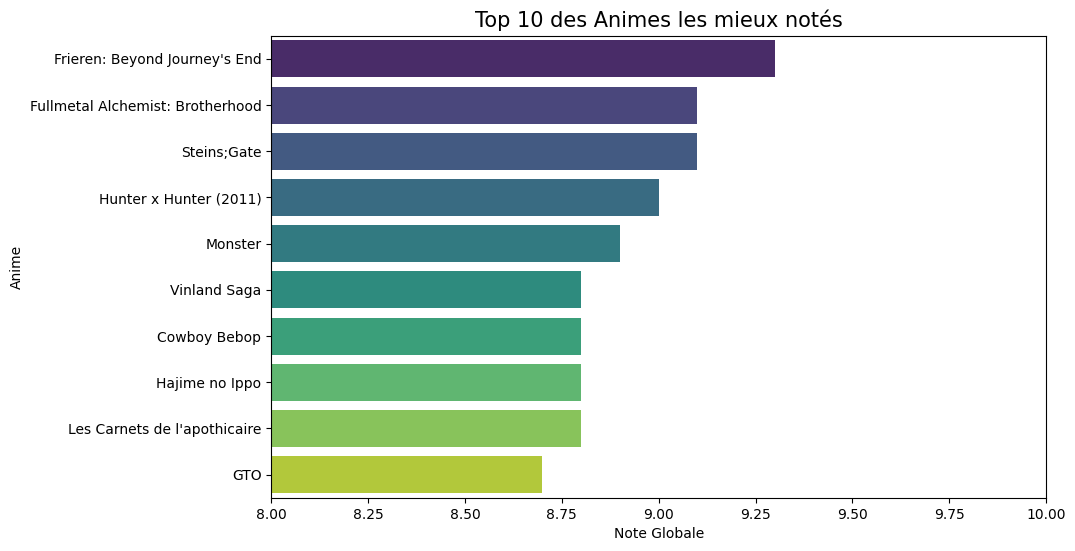

In [17]:
#classement des meilleurs animés selon la note globale 
plt.figure(figsize=(10, 6))
top_10 = df.sort_values(by='Note_Globale', ascending=False).head(10)

# CORRECTION ICI : Ajout de hue et legend=False pour éviter l'erreur rouge
sns.barplot(x='Note_Globale', y='Anime', data=top_10, palette='viridis', hue='Anime', legend=False)

plt.title('Top 10 des Animes les mieux notés', fontsize=15)
plt.xlabel('Note Globale')
plt.ylabel('Anime')
plt.xlim(8, 10)
plt.show()

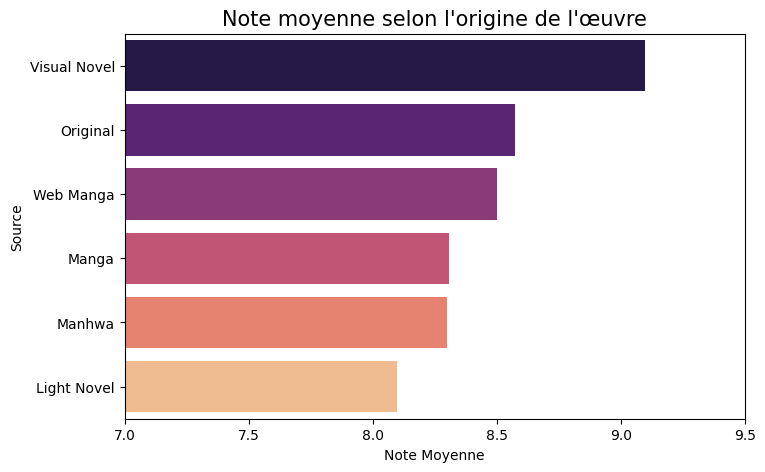

In [18]:
#note moyenne selon le type d'animé 
plt.figure(figsize=(8, 5))
avg_source = df.groupby('Source')['Note_Globale'].mean().sort_values(ascending=False).reset_index()

sns.barplot(x='Note_Globale', y='Source', data=avg_source, palette='magma', hue='Source', legend=False)

plt.title('Note moyenne selon l\'origine de l\'œuvre', fontsize=15)
plt.xlabel('Note Moyenne')
plt.xlim(7, 9.5)
plt.show()

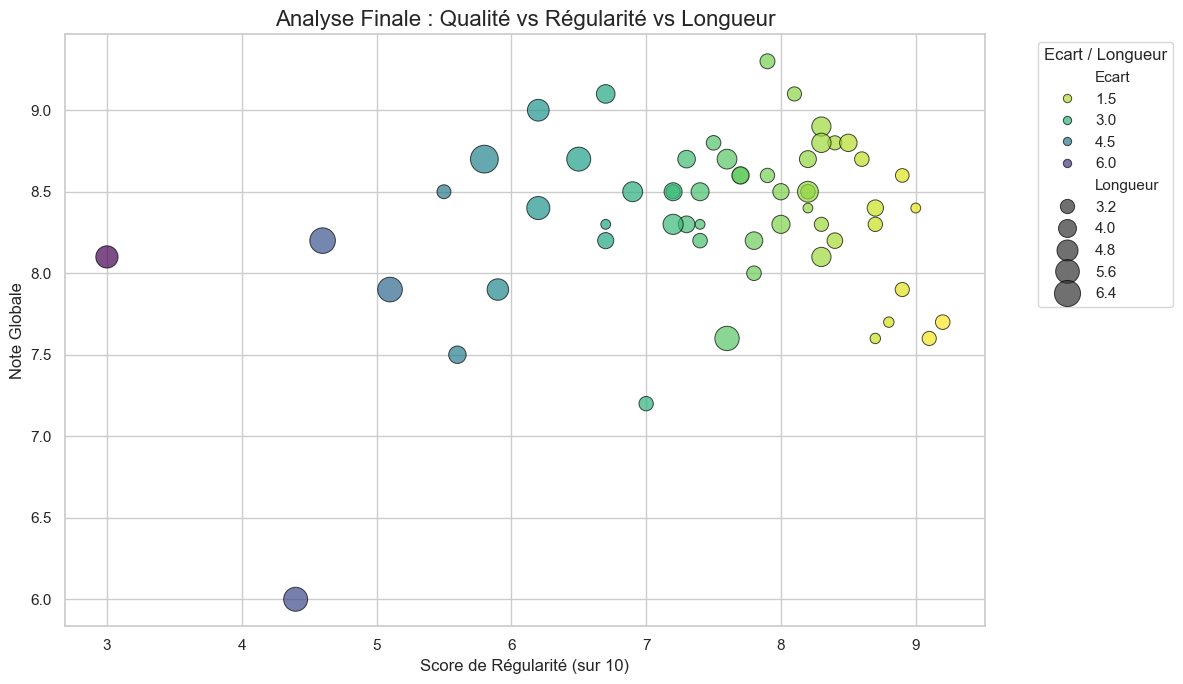

In [19]:
#nuage de points sur la relation note globale et la régularité 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df, 
    x='Regularite', 
    y='Note_Globale', 
    size='Longueur',    
    hue='Ecart',        
    sizes=(50, 400),    
    palette='viridis_r', 
    alpha=0.7,
    edgecolor='black'
)

plt.title('Analyse Finale : Qualité vs Régularité vs Longueur', fontsize=16)
plt.xlabel('Score de Régularité (sur 10)')
plt.ylabel('Note Globale')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Ecart / Longueur")
plt.tight_layout()

plt.show()